In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
%matplotlib inline

/kaggle/input/scrabble-player-rating/sample_submission.csv
/kaggle/input/scrabble-player-rating/games.csv
/kaggle/input/scrabble-player-rating/turns.csv
/kaggle/input/scrabble-player-rating/train.csv
/kaggle/input/scrabble-player-rating/test.csv


In [2]:
# reading all necessary files into the notebook
games = pd.read_csv('/kaggle/input/scrabble-player-rating/games.csv')
turns = pd.read_csv('/kaggle/input/scrabble-player-rating/turns.csv')
train = pd.read_csv('/kaggle/input/scrabble-player-rating/train.csv')
test = pd.read_csv('/kaggle/input/scrabble-player-rating/test.csv')

In [3]:
print('Shape of game dataframe is:', games.shape)
print('Shape of turns dataframe is:', turns.shape)
print('Shape of train dataframe is:', train.shape)
print('Shape of test dataframe is:', test.shape)

Shape of game dataframe is: (72773, 12)
Shape of turns dataframe is: (2005498, 9)
Shape of train dataframe is: (100820, 4)
Shape of test dataframe is: (44726, 4)


In [4]:
games.head()

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72773 entries, 0 to 72772
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                72773 non-null  int64  
 1   first                  72773 non-null  object 
 2   time_control_name      72773 non-null  object 
 3   game_end_reason        72773 non-null  object 
 4   winner                 72773 non-null  int64  
 5   created_at             72773 non-null  object 
 6   lexicon                72773 non-null  object 
 7   initial_time_seconds   72773 non-null  int64  
 8   increment_seconds      72773 non-null  int64  
 9   rating_mode            72773 non-null  object 
 10  max_overtime_minutes   72773 non-null  int64  
 11  game_duration_seconds  72773 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.7+ MB


In [6]:
turns.head()

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


In [7]:
train.isna().sum()

game_id     0
nickname    0
score       0
rating      0
dtype: int64

In [8]:
train.head()

,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


In [9]:
bots = ['BetterBot', 'STEEBot', 'HastyBot']

In [10]:
users_df = train[~train['nickname'].isin(bots)]
users_df = users_df.rename(columns={'nickname': 'user', 'score': 'user_score', 'rating': 'user_rating'})
users_df.head()

,game_id,user,user_score,user_rating
1,1,stevy,429,1500
2,3,davidavid,440,1811
4,4,Inandoutworker,119,1473
6,5,stevy,325,1500
8,6,HivinD,378,2029


In [11]:
bots_df = train[train['nickname'].isin(bots)]
bots_df = bots_df.rename(columns={'nickname': 'bots', 'score': 'bots_score', 'rating': 'bots_rating'})
bots_df.head()

,game_id,bots,bots_score,bots_rating
0,1,BetterBot,335,1637
3,3,BetterBot,318,2071
5,4,BetterBot,478,1936
7,5,STEEBot,427,1844
9,6,STEEBot,427,2143


In [12]:
train_df = pd.merge(users_df, bots_df, on='game_id')
train_df

,game_id,user,user_score,user_rating,bots,bots_score,bots_rating
0,1,stevy,429,1500,BetterBot,335,1637
1,3,davidavid,440,1811,BetterBot,318,2071
2,4,Inandoutworker,119,1473,BetterBot,478,1936
3,5,stevy,325,1500,STEEBot,427,1844
4,6,HivinD,378,2029,STEEBot,427,2143
...,...,...,...,...,...,...,...
50405,72767,HAYDEN,340,1395,BetterBot,414,1952
50406,72770,samsiah06,97,1332,HastyBot,590,2237
50407,72771,BB-8,390,1500,HastyBot,393,1614
50408,72772,Gtowngrad,388,1364,BetterBot,442,1674


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50410 entries, 0 to 50409
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   game_id      50410 non-null  int64 
 1   user         50410 non-null  object
 2   user_score   50410 non-null  int64 
 3   user_rating  50410 non-null  int64 
 4   bots         50410 non-null  object
 5   bots_score   50410 non-null  int64 
 6   bots_rating  50410 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 3.1+ MB


In [14]:
train_df.describe(include='all')

,game_id,user,user_score,user_rating,bots,bots_score,bots_rating
count,50410.000000,50410,50410.000000,50410.000000,50410,50410.000000,50410.000000
unique,NaN,1028,NaN,NaN,3,NaN,NaN
top,NaN,BB-8,NaN,NaN,HastyBot,NaN,NaN
freq,NaN,6576,NaN,NaN,17346,NaN,NaN
mean,36367.328605,NaN,376.060722,1790.322674,NaN,421.997322,1960.863202
std,21020.392953,NaN,72.739107,229.662441,NaN,70.423928,200.419697
min,1.000000,NaN,-64.000000,1033.000000,NaN,162.000000,1349.000000
25%,18139.750000,NaN,331.000000,1582.000000,NaN,373.000000,1827.000000
50%,36339.500000,NaN,378.000000,1818.000000,NaN,417.000000,1991.000000
75%,54624.750000,NaN,423.000000,1982.000000,NaN,465.000000,2124.000000


In [15]:
train_df.head()

,game_id,user,user_score,user_rating,bots,bots_score,bots_rating
0,1,stevy,429,1500,BetterBot,335,1637
1,3,davidavid,440,1811,BetterBot,318,2071
2,4,Inandoutworker,119,1473,BetterBot,478,1936
3,5,stevy,325,1500,STEEBot,427,1844
4,6,HivinD,378,2029,STEEBot,427,2143


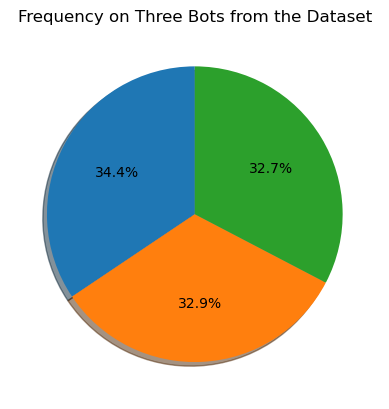

In [16]:
plt.pie(train_df['bots'].value_counts(), autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Frequency on Three Bots from the Dataset')
plt.show()

In [17]:
# sns.countplot(train_df, x='user')
train_df.user.value_counts()

BB-8          6576
pandorable    1759
Goldenlamb    1029
HivinD         592
kar2008        576
              ... 
sarahrazak       1
Anbu             1
Anita_H          1
OhMel            1
kacattac         1
Name: user, Length: 1028, dtype: int64

In [18]:
users_who_won = train_df[train_df['user_score'].values > train_df['bots_score'].values].shape
f'{users_who_won[0]} users (players) won their game'

'18288 users (players) won their game'

<AxesSubplot:>

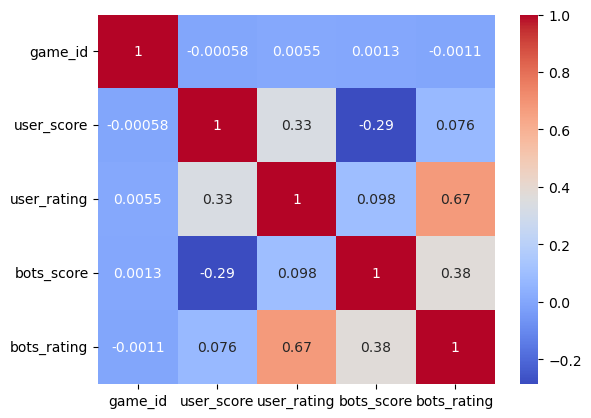

In [19]:
corr = train_df.corr(method='pearson')
sns.heatmap(corr, annot=True, cbar=True, cmap='coolwarm')

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lab_encode = LabelEncoder()
train_df['bots'] = lab_encode.fit_transform(train_df['bots'])
train_df.head()

,game_id,user,user_score,user_rating,bots,bots_score,bots_rating
0,1,stevy,429,1500,0,335,1637
1,3,davidavid,440,1811,0,318,2071
2,4,Inandoutworker,119,1473,0,478,1936
3,5,stevy,325,1500,2,427,1844
4,6,HivinD,378,2029,2,427,2143


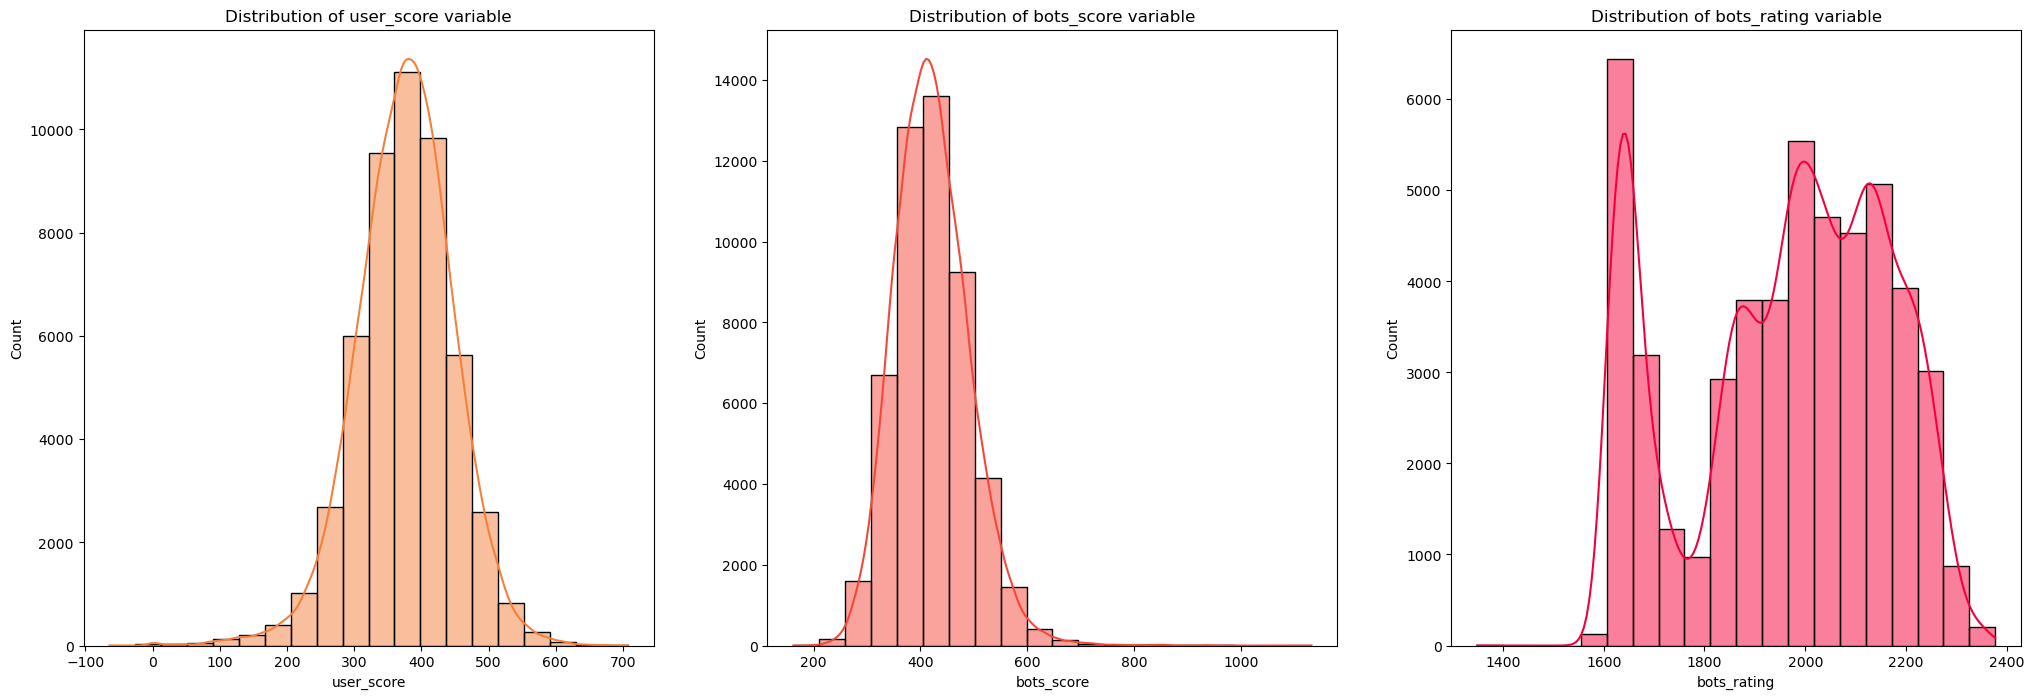

In [22]:
fig, axes = plt.subplots(1, 3, figsize = (25, 8))
ax = axes.flatten()
sns.histplot(ax = axes[0], x = train_df["user_score"], bins = 20, kde = True, color = "#f5803d").set(title = "Distribution of user_score variable");
sns.histplot(ax = axes[1], x = train_df["bots_score"], bins = 20, kde = True, color = "#f5483a").set(title = "Distribution of bots_score variable");
sns.histplot(ax = axes[2], x = train_df["bots_rating"], bins = 20, kde = True, color = "#f5003d").set(title = "Distribution of bots_rating variable");

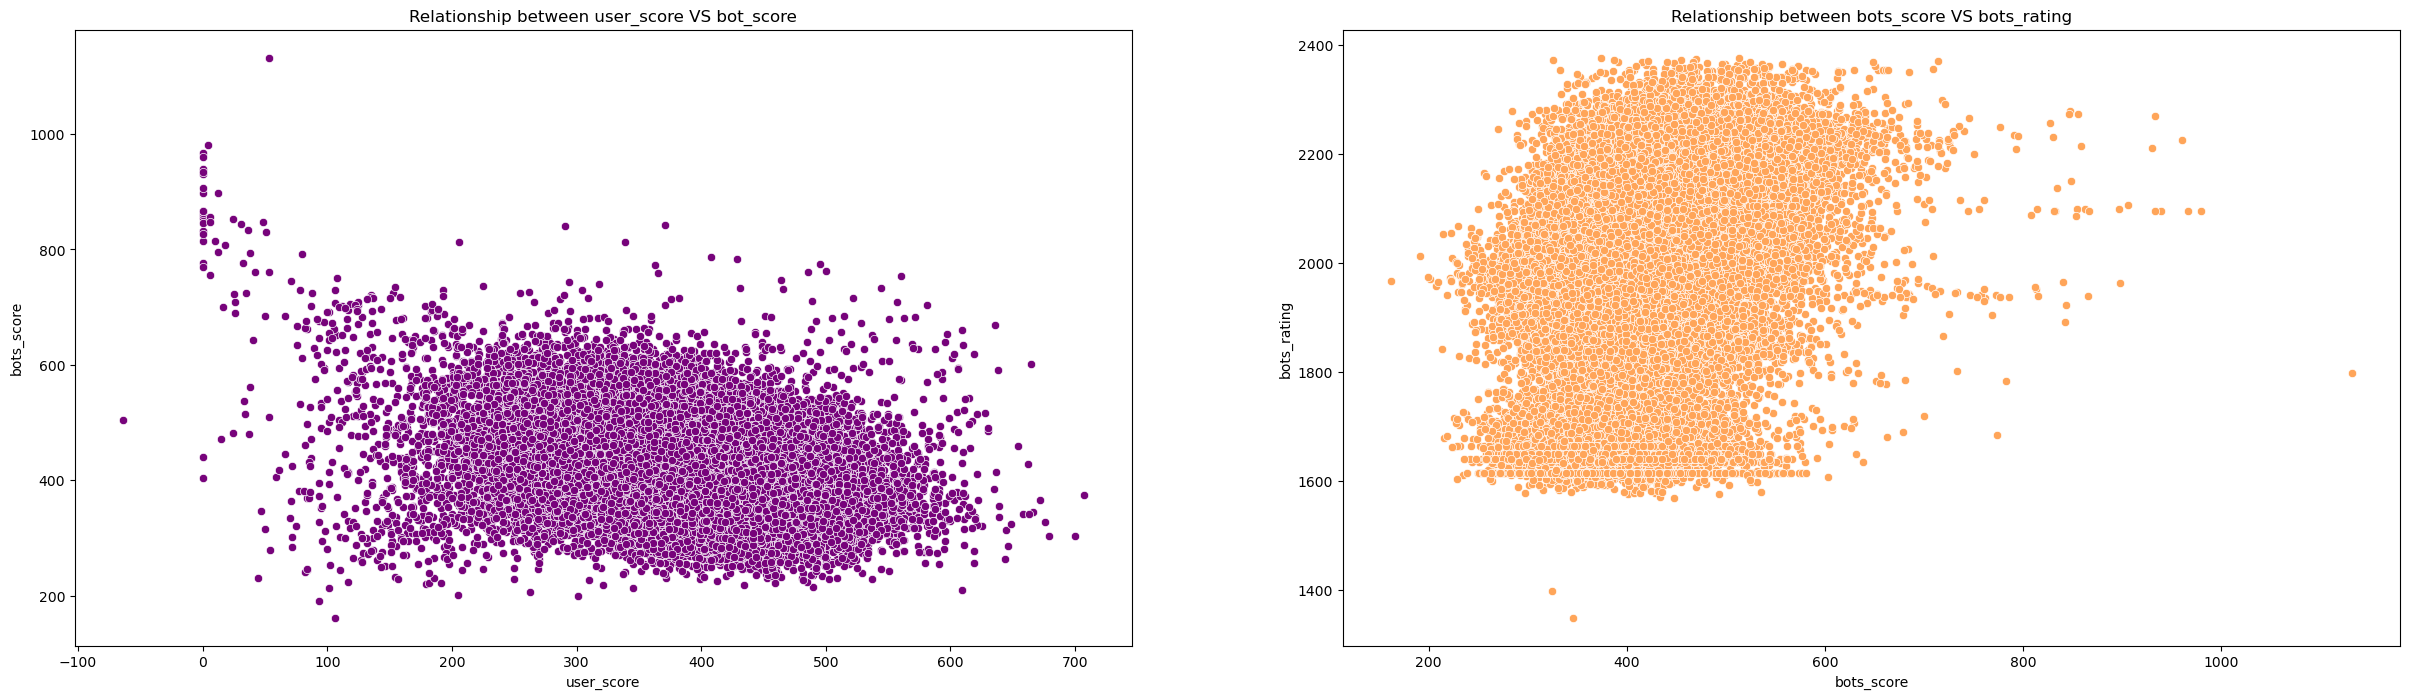

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (30, 8))
axes = axes.flatten()
sns.scatterplot(ax = axes[0], x = "user_score", y = "bots_score", data = train_df, color = "#77037B").set(title = "Relationship between user_score VS bot_score");
sns.scatterplot(ax = axes[1], x = "bots_score", y = "bots_rating", data = train_df, color = "#FFA559").set(title = "Relationship between bots_score VS bots_rating")
plt.show()

## Model Selection

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [25]:
# import metrics for model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [26]:
models = {'linear_reg': LinearRegression(),
          'lasso': Lasso(),
          'ridge': Ridge(),
          'decision_tree': DecisionTreeRegressor(),
          'adaBoost': AdaBoostRegressor(),
          'bagging': BaggingRegressor(),
          'gradientBoost': GradientBoostingRegressor(),
          'svm': SVR(),
          'neural_network': MLPRegressor()}

In [27]:
def evaluate_models(models_dict, x_train, y_train):
    """
    Evaluate models using x_train and y_train data.

    Parameters:
        - models (dict): Dictionary of models with model names as keys and model initialization as values.
        - x_train (array-like): Input training data.
        - y_train (array-like): Target training data.

    Returns:
        - df (pandas DataFrame): DataFrame containing model_name, rms, r2, and mae for each model.
    """
    results = []
    for model_name, model in models_dict.items():
        # Fit the model
        model.fit(x_train, y_train)
        
        # Predict on training data
        y_pred = model.predict(x_train)
        
        # Calculate evaluation metrics
        rms = mean_squared_error(y_train, y_pred, squared=True)
        r2 = r2_score(y_train, y_pred)
        mae = mean_absolute_error(y_train, y_pred)
        
        # Append results to list
        results.append([model_name, rms, r2, mae])
    # Create DataFrame from results list
    df = pd.DataFrame(results, columns=['model_name', 'rms', 'r2', 'mae'])
    
    return df

In [28]:
X_train = train_df.drop(['user', 'game_id', 'user_rating'], axis=1)
Y_train = train_df['user_rating']

In [29]:
evaluate_models(models, X_train, Y_train)

,model_name,rms,r2,mae
0,linear_reg,24034.186013,0.544322,116.082059
1,lasso,24035.973593,0.544288,116.119725
2,ridge,24034.186013,0.544322,116.082071
3,decision_tree,7.796707,0.999852,0.067883
4,adaBoost,29741.394256,0.436116,136.661689
5,bagging,4261.858893,0.919197,43.289392
6,gradientBoost,19880.375124,0.623076,100.681853
7,svm,25593.311646,0.514762,115.183184
8,neural_network,22964.249143,0.564608,112.647722


In [30]:
model = DecisionTreeRegressor().fit(X_train, Y_train)
model.score(X_train, Y_train)

0.9998521777274912

In [31]:
test_user_df = test[~test['nickname'].isin(bots)]
test_bots_df = test[test['nickname'].isin(bots)]

user_column = {'nickname': 'user', 'score': 'user_score', 'rating': 'user_rating'}
bots_column = {'nickname': 'bots', 'score': 'bots_score', 'rating': 'bots_rating'}

test_user_df = test_user_df.rename(columns=user_column)
test_bots_df = test_bots_df.rename(columns=bots_column)

test_df = pd.merge(test_user_df, test_bots_df, on='game_id')

X_test = test_df.drop(['user', 'game_id', 'user_rating'], axis=1)

X_test['bots'] = lab_encode.fit_transform(X_test['bots'])

In [32]:
predictions = pd.DataFrame()
predictions['game_id'] = test_user_df['game_id']
predictions['user_ratings'] = model.predict(X_test)
predictions.reset_index(drop=True)
final_predictions = predictions.set_index('game_id')
final_predictions.to_csv('submission.csv', index=False)
'Submitted successfully'

'Submitted successfully'